<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Happy 데이터를 불러와 살펴봅니다.
- 단순 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/income_happy.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [4]:
# 하위 몇 개 행 확인
data.tail()

,income,happiness
493,5.249209,4.568705
494,3.471799,2.535002
495,6.087610,4.397451
496,3.440847,2.070664
497,4.530545,3.710193


**[데이터 정보]**

- income: 수입 (단위: 10,000$)
- happiness: 행복 정도 (1~ 10)

In [5]:
# 기초통계량 확인
data.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


In [7]:
# Income --> Hapiness 상관 관계
data.corr()

,income,happiness
income,1.000000,0.865634
happiness,0.865634,1.000000


# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [8]:
# target 확인
target = 'happiness'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                   random_state=2022)

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.

In [10]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [11]:
# 2단계: 선언하기
model = LinearRegression()

In [12]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [13]:
# 회귀계수 확인
print(model.coef_) # 기울기 == 가중치
print(model.intercept_) # 절편

# y = 0.7242665 * x + 0.15575776095537952
# happiness = 0.7242665 * incom + 0.15575776095537952

[0.7242665]
0.15575776095537952


In [14]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [15]:
# 5단계: 평가하기

print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 0.5466885866485439
R2-Score: 0.7756709291514665


# 5.기타

- 기타 필요한 내용이 있으면 진횅합니다.

**1) 회귀식 시각화**

> y = ax + b

In [16]:
# 선형회귀식
a = model.coef_
b = model.intercept_
x = np.linspace(x_test.min(), x_test.max(), 10)
y = a * x + b

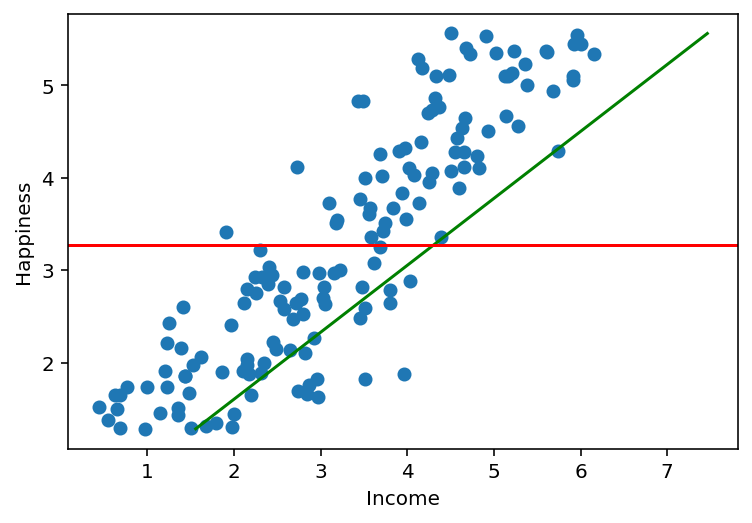

In [24]:
# 시각화
mean_income = y_test.mean() # 평균값
plt.scatter(y_test, y_pred)
plt.plot(x, y, color='g') # 선형회귀식
plt.axhline(mean_income, color='r') # 평균선
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.show()

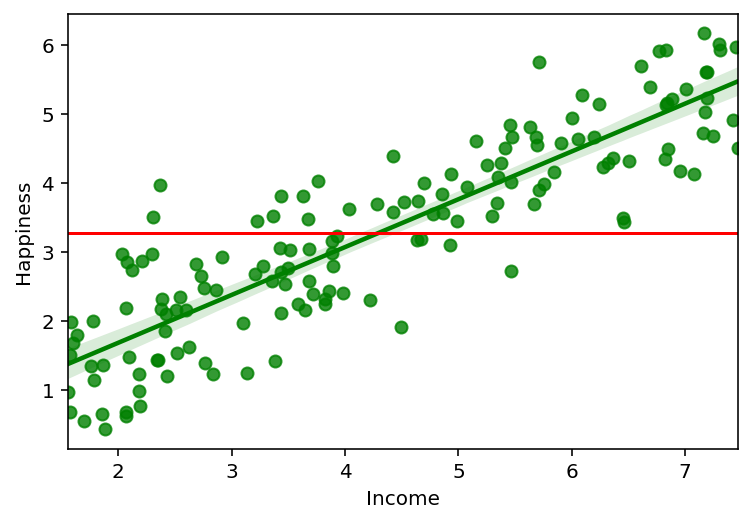

In [25]:
# seaborn 으로 시각화
import seaborn as sns
mean_speed = y_test.mean() # 평균값
sns.regplot(x=x_test, y=y_test, color='g')
plt.axhline(mean_speed, color='r') # 평균선(y바)
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.show()

**2) 예측값, 실제값 시각화**

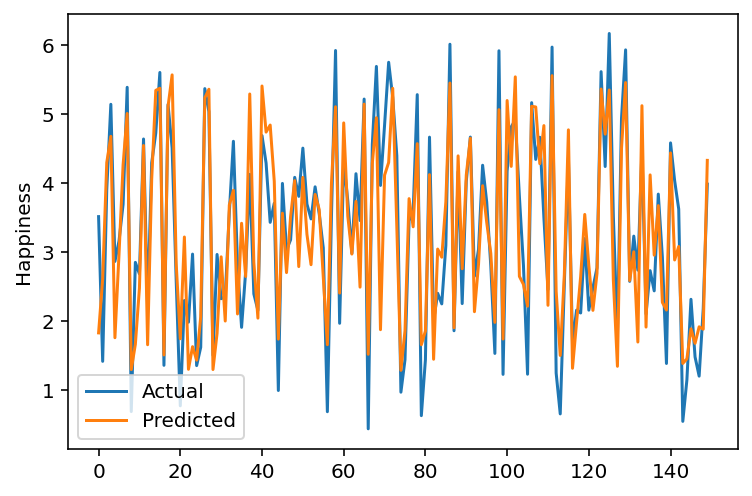

In [32]:
# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('Happiness')
plt.show()